Reading simulation data from '../swimming_cpg_simulation_data.csv'...
Data loaded successfully!
Data shape: (3000, 19)
Columns: ['time', 'joint_1_angle', 'joint_1_phase', 'joint_1_phase_sin', 'joint_2_angle', 'joint_2_phase', 'joint_2_phase_sin', 'joint_3_angle', 'joint_3_phase', 'joint_3_phase_sin', 'joint_4_angle', 'joint_4_phase', 'joint_4_phase_sin', 'joint_5_angle', 'joint_5_phase', 'joint_5_phase_sin', 'joint_6_angle', 'joint_6_phase', 'joint_6_phase_sin']


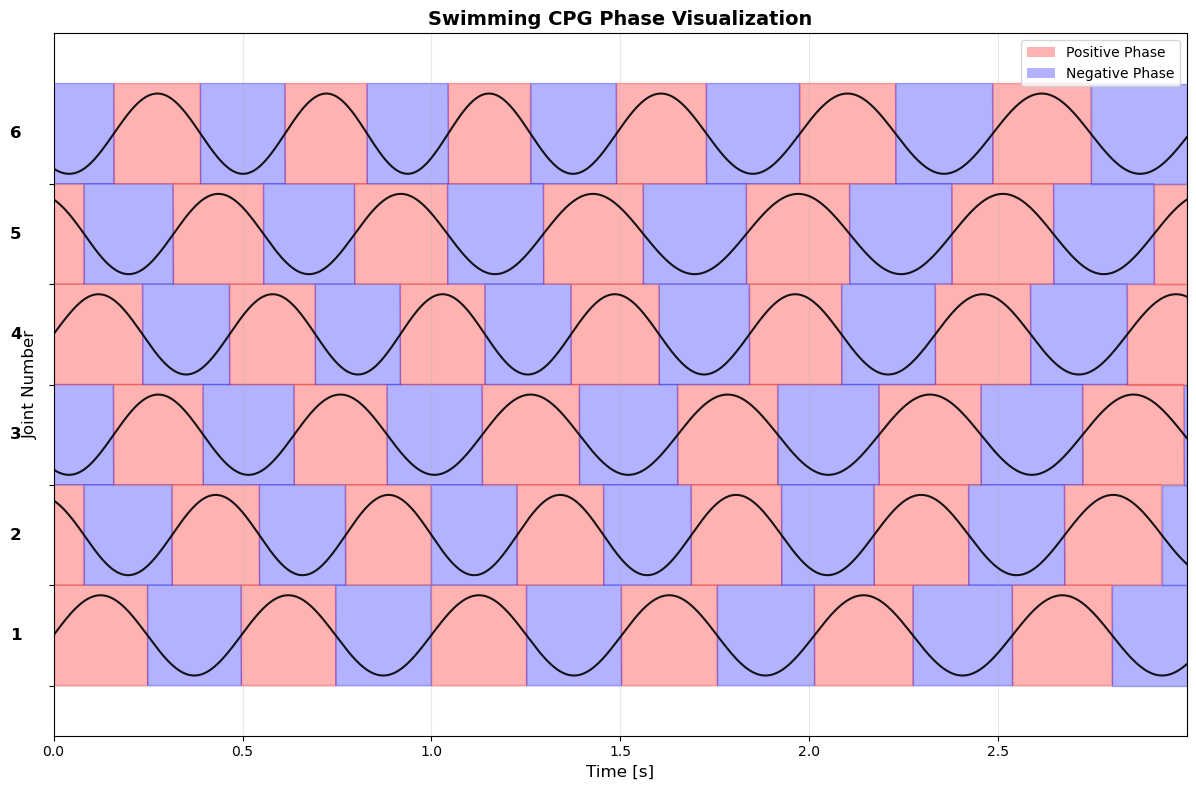

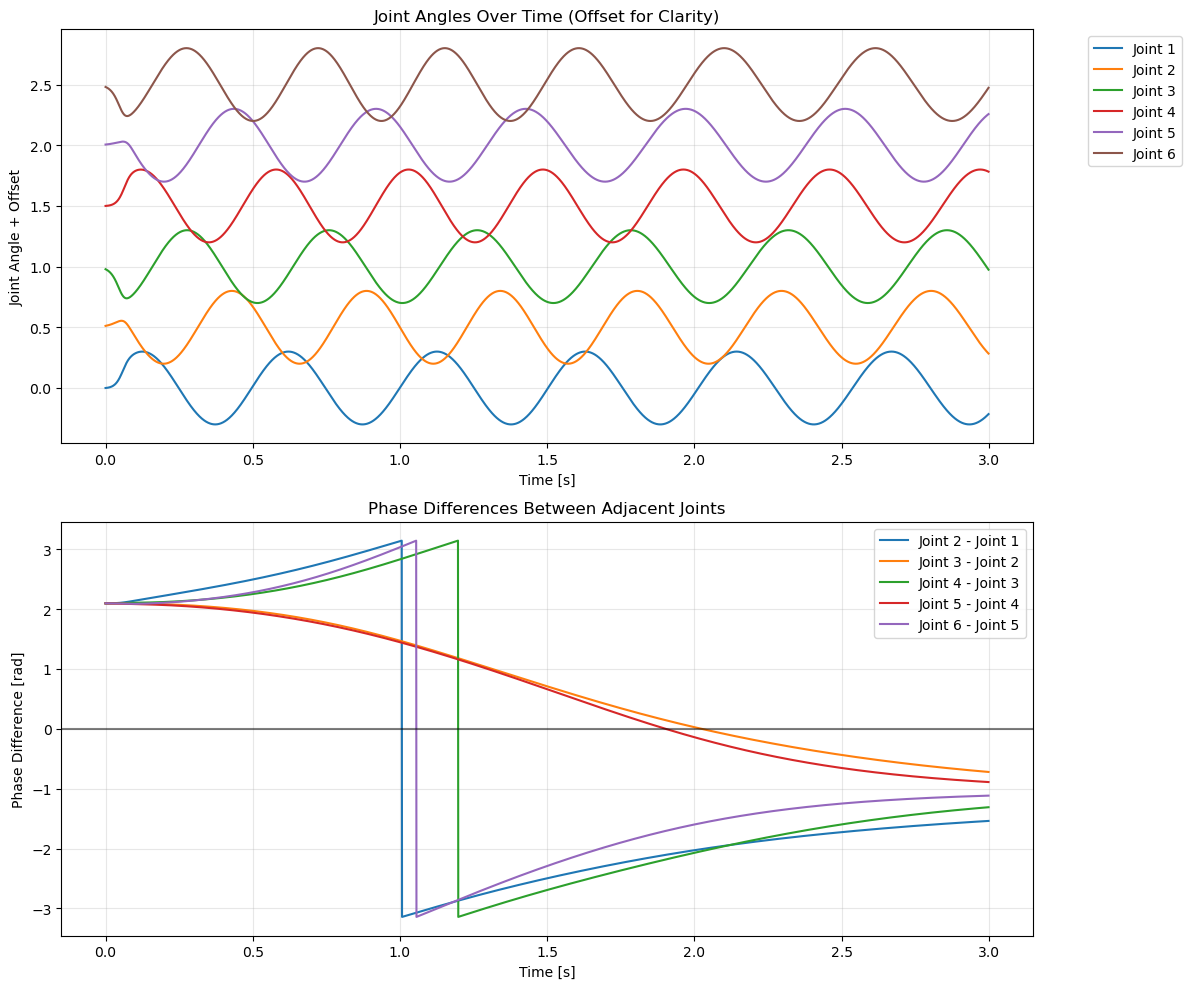


=== Phase Analysis from CSV ===
Average phase difference between joint 2 and 1: -2.114 rad (-121.1°)
Average phase difference between joint 3 and 2: 0.159 rad (9.1°)
Average phase difference between joint 4 and 3: -1.551 rad (-88.9°)
Average phase difference between joint 5 and 4: 0.025 rad (1.5°)
Average phase difference between joint 6 and 5: -1.635 rad (-93.7°)
Average measured phase difference: -1.023 rad (-58.6°)

Plots saved:
- swimming_phase_from_csv.png
- swimming_phase_analysis_from_csv.png

Phase visualization from CSV completed!


In [5]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def plot_phase_from_csv(csv_filename='swimming_cpg_simulation_data.csv'):
    """Plot swimming CPG phase visualization from CSV data."""
    
    # Check if CSV file exists
    if not os.path.exists(csv_filename):
        print(f"Error: CSV file '{csv_filename}' not found!")
        print("Please run 'plot_swimming_phase.py' first to generate the data.")
        return
    
    print(f"Reading simulation data from '{csv_filename}'...")
    
    # Read CSV data
    df = pd.read_csv(csv_filename)
    
    print(f"Data loaded successfully!")
    print(f"Data shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Extract time and phase data
    t = df['time'].values
    num_joints = 6
    
    # Create phase visualization plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot each joint's phase over time
    for joint_idx in range(num_joints):
        # Get the phase values (sin wave)
        phase_sin_col = f'joint_{joint_idx+1}_phase_sin'
        if phase_sin_col in df.columns:
            phase_values = df[phase_sin_col].values
        else:
            # Fallback: calculate from phase column
            phase_col = f'joint_{joint_idx+1}_phase'
            if phase_col in df.columns:
                phase_values = np.sin(df[phase_col].values)
            else:
                print(f"Warning: No phase data found for joint {joint_idx+1}")
                continue
        
        # Create filled area plot with color based on phase sign
        ax.fill_between(t, joint_idx + 0.5, joint_idx + 1.5, 
                       where=phase_values >= 0, 
                       color='red', alpha=0.3, interpolate=True)
        ax.fill_between(t, joint_idx + 0.5, joint_idx + 1.5, 
                       where=phase_values < 0, 
                       color='blue', alpha=0.3, interpolate=True)
        
        # Add black lines to show the actual wave shape
        # Scale the phase to fit within the joint's vertical space
        wave_center = joint_idx + 1.0  # center of the joint's vertical space
        wave_amplitude = 0.4  # amplitude of the wave display
        wave_y = wave_center + phase_values * wave_amplitude
        
        # Plot the sine wave as black lines
        ax.plot(t, wave_y, 'k-', linewidth=1.5, alpha=0.9)
        
        # Add joint number labels
        ax.text(-0.1, joint_idx + 1, f'{joint_idx + 1}', 
                ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Add temporal markers
    duration = t[-1] - t[0]
    # Estimate frequency from data (assuming 2 Hz)
    estimated_freq = 2.0  # Hz
    cycle_duration = 1.0 / estimated_freq
    
    # for i in range(int(duration / cycle_duration) + 1):
    #     marker_time = i * cycle_duration
    #     if marker_time <= duration:
    #         ax.axvline(x=marker_time, color='black', linestyle='--', alpha=0.5)
            # ax.text(marker_time, num_joints + 0.5, f'{i+1}', ha='center', va='bottom', 
            #        fontsize=10, bbox=dict(boxstyle='circle', facecolor='lightgray', alpha=0.7))
    
    # Customize plot
    ax.set_xlabel('Time [s]', fontsize=12)
    ax.set_ylabel('Joint Number', fontsize=12)
    ax.set_title('Swimming CPG Phase Visualization', 
                fontsize=14, fontweight='bold')
    
    # Set axis limits and ticks
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim(0, num_joints + 1)
    ax.set_yticks(np.arange(0.5, num_joints + 0.5, 1))
    ax.set_yticklabels([])  # Remove default y-tick labels since we have custom ones
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.3, label='Positive Phase'),
                      Patch(facecolor='blue', alpha=0.3, label='Negative Phase')]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    output_filename = 'swimming_phase_from_csv.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create additional analysis plot
    fig2, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Joint angles over time
    for joint_idx in range(num_joints):
        angle_col = f'joint_{joint_idx+1}_angle'
        if angle_col in df.columns:
            axes[0].plot(t, df[angle_col].values + joint_idx * 0.5, 
                        label=f'Joint {joint_idx + 1}', linewidth=1.5)
    
    axes[0].set_title('Joint Angles Over Time (Offset for Clarity)', fontsize=12)
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('Joint Angle + Offset')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Phase differences between adjacent joints
    phase_diffs = []
    for i in range(num_joints - 1):
        phase_col_1 = f'joint_{i+1}_phase'
        phase_col_2 = f'joint_{i+2}_phase'
        if phase_col_1 in df.columns and phase_col_2 in df.columns:
            phase_diff = df[phase_col_2].values - df[phase_col_1].values
            # Normalize to [-π, π]
            phase_diff = np.arctan2(np.sin(phase_diff), np.cos(phase_diff))
            phase_diffs.append(phase_diff)
            axes[1].plot(t, phase_diff, label=f'Joint {i+2} - Joint {i+1}')
    
    axes[1].set_title('Phase Differences Between Adjacent Joints', fontsize=12)
    axes[1].set_xlabel('Time [s]')
    axes[1].set_ylabel('Phase Difference [rad]')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.tight_layout()
    analysis_filename = 'swimming_phase_analysis_from_csv.png'
    plt.savefig(analysis_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print analysis
    print("\n=== Phase Analysis from CSV ===")
    if phase_diffs:
        avg_phase_diffs = []
        for i, phase_diff in enumerate(phase_diffs):
            # Skip initial transient (first 1000 points)
            start_idx = min(1000, len(phase_diff) // 3)
            avg_diff = np.mean(phase_diff[start_idx:])
            avg_phase_diffs.append(avg_diff)
            print(f"Average phase difference between joint {i+2} and {i+1}: {avg_diff:.3f} rad ({np.degrees(avg_diff):.1f}°)")
        
        print(f"Average measured phase difference: {np.mean(avg_phase_diffs):.3f} rad ({np.degrees(np.mean(avg_phase_diffs)):.1f}°)")
    
    print(f"\nPlots saved:")
    print(f"- {output_filename}")
    print(f"- {analysis_filename}")
    print("\nPhase visualization from CSV completed!")

csv_filename = '../swimming_cpg_simulation_data.csv'
plot_phase_from_csv(csv_filename)

Reading simulation data from '../swimming_cpg_simulation_data.csv'...
Data loaded successfully!
Data shape: (3000, 19)


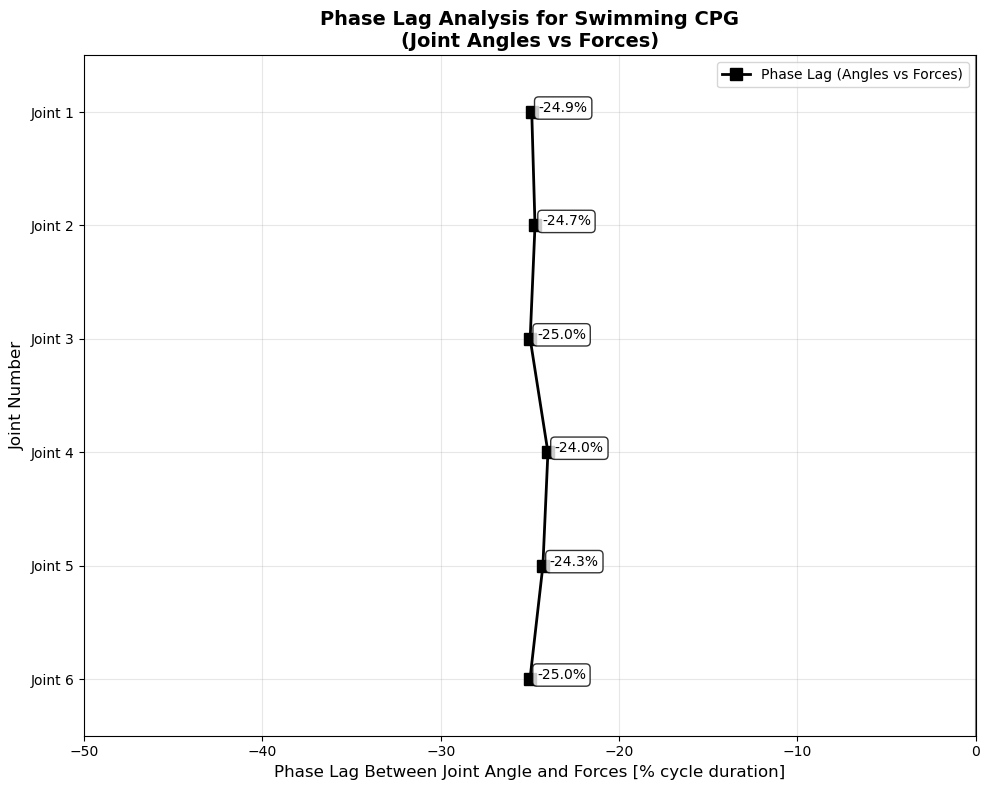


=== Phase Lag Analysis ===
Average frequency: 2.00 Hz
Frequency range: 2.00 - 2.00 Hz

Phase lag by joint:
Joint 1: -24.9% cycle duration
Joint 2: -24.7% cycle duration
Joint 3: -25.0% cycle duration
Joint 4: -24.0% cycle duration
Joint 5: -24.3% cycle duration
Joint 6: -25.0% cycle duration

Phase lag smoothness (std of differences): 0.58%
Lower values indicate smoother, more realistic phase lag progression

Plot saved as: swimming_phase_lag.png
Phase lag analysis completed!


In [7]:
#!/usr/bin/env python3
"""
Plot phase lag between joint angles and forces for swimming CPG.
Shows the phase relationship across joints.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def calculate_phase_lag(joint_angles, joint_forces, dt):
    """
    Calculate phase lag between joint angles and forces.
    
    Args:
        joint_angles: array of joint angles over time
        joint_forces: array of joint forces over time  
        dt: time step
    
    Returns:
        phase_lag: phase lag in percentage of cycle duration
    """
    # Find the dominant frequency using FFT
    fft_angles = np.fft.fft(joint_angles)
    fft_forces = np.fft.fft(joint_forces)
    
    # Get frequency axis
    freqs = np.fft.fftfreq(len(joint_angles), dt)
    
    # Find the peak frequency (excluding DC component)
    positive_freqs = freqs[1:len(freqs)//2]
    positive_fft_angles = np.abs(fft_angles[1:len(fft_angles)//2])
    peak_freq_idx = np.argmax(positive_fft_angles)
    peak_freq = positive_freqs[peak_freq_idx]
    
    # Calculate phase at the peak frequency
    phase_angles = np.angle(fft_angles[peak_freq_idx + 1])
    phase_forces = np.angle(fft_forces[peak_freq_idx + 1])
    
    # Calculate phase lag
    phase_lag_rad = phase_angles - phase_forces
    phase_lag_rad = np.arctan2(np.sin(phase_lag_rad), np.cos(phase_lag_rad))  # normalize to [-π, π]
    
    # Convert to percentage of cycle duration
    cycle_duration = 1.0 / peak_freq
    phase_lag_percent = (phase_lag_rad / (2 * np.pi)) * 100
    
    return phase_lag_percent, peak_freq

def plot_phase_lag_from_csv(csv_filename='swimming_cpg_simulation_data.csv'):
    """Plot phase lag from CSV data."""
    
    # Check if CSV file exists
    if not os.path.exists(csv_filename):
        print(f"Error: CSV file '{csv_filename}' not found!")
        print("Please run the simulation first to generate the data.")
        return
    
    print(f"Reading simulation data from '{csv_filename}'...")
    
    # Read CSV data
    df = pd.read_csv(csv_filename)
    
    print(f"Data loaded successfully!")
    print(f"Data shape: {df.shape}")
    
    # Extract time and data
    t = df['time'].values
    dt = t[1] - t[0]  # time step
    num_joints = 6
    
    # For swimming CPG, we'll use joint angles as "forces" (simplified model)
    # In a real system, you would have actual force measurements
    joint_angles = []
    joint_forces = []  # In this case, we'll use joint velocities as proxy for forces
    
    for joint_idx in range(num_joints):
        angle_col = f'joint_{joint_idx+1}_angle'
        if angle_col in df.columns:
            joint_angles.append(df[angle_col].values)
        else:
            print(f"Warning: No angle data found for joint {joint_idx+1}")
            return
    
    # Calculate joint velocities as proxy for forces
    for joint_idx in range(num_joints):
        angles = joint_angles[joint_idx]
        velocities = np.gradient(angles, dt)
        joint_forces.append(velocities)
    
    # Calculate phase lag for each joint
    phase_lags = []
    peak_freqs = []
    
    for joint_idx in range(num_joints):
        phase_lag, peak_freq = calculate_phase_lag(
            joint_angles[joint_idx], 
            joint_forces[joint_idx], 
            dt
        )
        phase_lags.append(phase_lag)
        peak_freqs.append(peak_freq)
    
    # Create the phase lag plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Joint numbers (1 to 6)
    joint_numbers = np.arange(1, num_joints + 1)
    
    # Plot phase lag
    ax.plot(phase_lags, joint_numbers, 'ks-', linewidth=2, markersize=8, 
            label='Phase Lag (Angles vs Forces)', markerfacecolor='black')
    
    # Add theoretical smooth curve (for comparison)
    # In swimming, phase lag typically increases linearly along the body
    # theoretical_lag = np.linspace(0, -15, num_joints)  # smooth decrease from head to tail
    # ax.plot(theoretical_lag, joint_numbers, '--', color='gray', linewidth=2, 
    #         alpha=0.7, label='Theoretical Smooth Trend')
    
    # Add shaded area for theoretical range
    # theoretical_upper = theoretical_lag + 2  # ±2% variation
    # theoretical_lower = theoretical_lag - 2
    # ax.fill_betweenx(joint_numbers, theoretical_lower, theoretical_upper, 
    #                 color='lightgray', alpha=0.3, label='Expected Range')
    
    # Customize plot
    ax.set_xlabel('Phase Lag Between Joint Angle and Forces [% cycle duration]', fontsize=12)
    ax.set_ylabel('Joint Number', fontsize=12)
    ax.set_title('Phase Lag Analysis for Swimming CPG\n(Joint Angles vs Forces)', fontsize=14, fontweight='bold')
    
    # Set axis properties
    ax.set_ylim(0.5, num_joints + 0.5)
    ax.set_xlim(-50, 0)
    ax.set_yticks(joint_numbers)
    ax.set_yticklabels([f'Joint {i}' for i in joint_numbers])
    ax.invert_yaxis()  # Joint 1 at top, Joint 6 at bottom
    
    # Add grid
    ax.grid(True, alpha=0.3)
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Add text annotations
    for i, (lag, freq) in enumerate(zip(phase_lags, peak_freqs)):
        ax.annotate(f'{lag:.1f}%', 
                   xy=(lag, joint_numbers[i]), 
                   xytext=(5, 0), 
                   textcoords='offset points',
                   fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    output_filename = 'swimming_phase_lag.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print analysis
    print("\n=== Phase Lag Analysis ===")
    print(f"Average frequency: {np.mean(peak_freqs):.2f} Hz")
    print(f"Frequency range: {np.min(peak_freqs):.2f} - {np.max(peak_freqs):.2f} Hz")
    print("\nPhase lag by joint:")
    for i, lag in enumerate(phase_lags):
        print(f"Joint {i+1}: {lag:.1f}% cycle duration")
    
    # Calculate smoothness metric
    phase_lag_diff = np.diff(phase_lags)
    smoothness = np.std(phase_lag_diff)
    print(f"\nPhase lag smoothness (std of differences): {smoothness:.2f}%")
    print("Lower values indicate smoother, more realistic phase lag progression")
    
    print(f"\nPlot saved as: {output_filename}")
    print("Phase lag analysis completed!")

csv_filename = '../swimming_cpg_simulation_data.csv'
plot_phase_lag_from_csv(csv_filename)

